In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

from polygon import RESTClient

In [2]:
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from polygon_api import PolygonAPI

In [4]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'IBM', 'AMZN', 'NVDA',
          'XOM', 'CVX', 'WMT', 'MMM', 'ARE', 'ALLE', 'JPM',
          'V', 'MA', 'PEP', 'CSCO', 'BA', 'ADBE', 'CAT', 
          'BLK', 'INTC', 'NKE', 'MDLZ']

In [ ]:
if __name__ == '__main__':
    # Initialize the Polygon API client
    client = RESTClient(api_key='rxdopHP51cQc3RtUbZrNj7Gy0CkpR2Qn')
    client = PolygonAPI()

    intra_day = client.last_working_day()

    for i, ticker in enumerate(tickers):
        # The sink path for the write operation
        sink_root_path = f'C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/intraday/{ticker.lower()}/{ticker.lower()}_intraday_{intra_day.replace('-', '_')}.parquet'
        
        # Check if the file already exists
        if os.path.exists(sink_root_path):
            # print(f"File already exists: {sink_root_path}. Skipping...\n")
            continue # Skip if the file already exists

        # Fetch intraday data for the ticker
        print(f"{i+1}/{len(tickers)} - Fetching data for: {ticker}, on {intra_day}")
        intra_day_ticker = client.fetch_aggs_with_backoff(
            ticker=ticker, 
            from_date=intra_day, 
            to_date=intra_day, 
            limit=50000,
            sleep=True
            )

        print("Structuring data into a Pandas DataFrame...")
        df = pd.DataFrame(intra_day_ticker).T

        print("Saving intraday to parquet file...")
        df.to_parquet(sink_root_path, index=True)
        print(f"Data for {ticker} written to {sink_root_path}")
        print("----------------------------")

In [77]:
intra_day

'2025-05-27'

In [86]:
if __name__ == '__main__':
    # Initialize the Polygon API client
    client = RESTClient(api_key='rxdopHP51cQc3RtUbZrNj7Gy0CkpR2Qn')
    client = PolygonAPI()

    to_date = client.last_working_day()
    from_date = f"{to_date[:4]}-01-01"

    for i, ticker in enumerate(tickers):
        # The sink path for the write operation
        sink_root_path = f'C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/daily/{ticker.lower()}/{ticker.lower()}_daily_{from_date[:4]}.parquet'
        
        # Check if the file already exists
        if os.path.exists(sink_root_path):
            # print(f"File already exists: {sink_root_path}. Skipping...\n")
            continue # Skip if the file already exists

        # Fetch intraday data for the ticker
        print(f"{i+1}/{len(tickers)} - Fetching data for: {ticker}, from {from_date} to {to_date}")
        intra_day_ticker = client.fetch_aggs_with_backoff(
            ticker=ticker,
            timespan='day',
            from_date=from_date, 
            to_date=to_date,
            limit=50000,
            sleep=True
            )

        print("Structuring data into a Pandas DataFrame...")
        df = pd.DataFrame(intra_day_ticker).T

        print("Saving intraday to parquet file...")
        df.to_parquet(sink_root_path, index=True)
        print(f"Data for {ticker} written to {sink_root_path}")
        print("----------------------------")

1/24 - Fetching data for: AAPL, from 2025-01-01 to 2025-05-27
Structuring data into a Pandas DataFrame...
Saving intraday to parquet file...
Data for AAPL written to C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/daily/aapl/aapl_daily_2025.parquet
----------------------------
2/24 - Fetching data for: MSFT, from 2025-01-01 to 2025-05-27
Structuring data into a Pandas DataFrame...
Saving intraday to parquet file...
Data for MSFT written to C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/daily/msft/msft_daily_2025.parquet
----------------------------
3/24 - Fetching data for: GOOGL, from 2025-01-01 to 2025-05-27
Structuring data into a Pandas DataFrame...
Saving intraday to parquet file...
Data for GOOGL written to C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/daily/googl/googl_daily_2025.parquet
----------------------------
4/24 - Fetching data for: IBM, from 2025-01-01 to 2025-05-27
Structuring data into a Pandas DataFrame...
Saving intraday to parquet 

In [72]:
source_path = "~/git_repos/project-anthill/data/polygon/intraday/amzn/"

df = pd.read_parquet(source_path)
df.sort_index(inplace=True)

In [73]:
df['simple_return'] = (df['close'] / df['close'].shift(1)) - 1
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
# df.head()

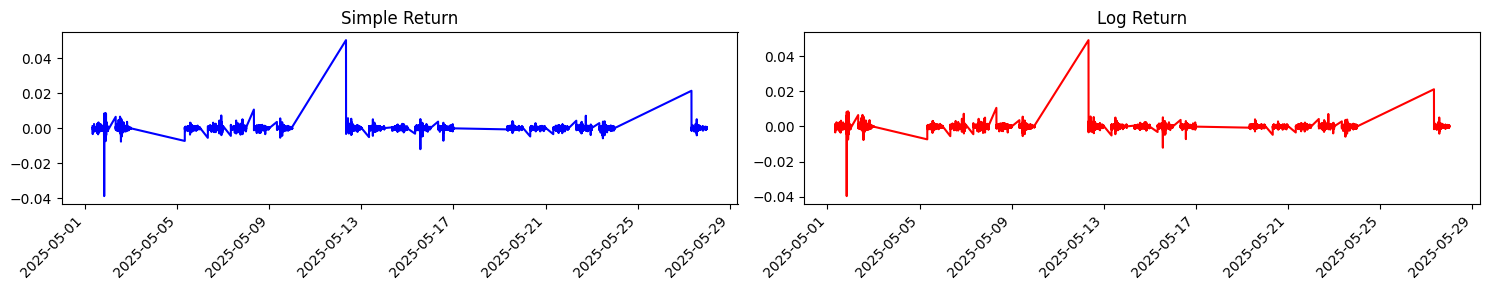

Simple Return: 0.00057 %
Log Return: 0.00052 %


In [74]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
df['simple_return'].plot(ax=axes[0], title='Simple Return', color='blue')
df['log_return'].plot(ax=axes[1], title='Log Return', color='red')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

print(f"Simple Return: {round(df['simple_return'].mean() * 100, 5)} %")
print(f"Log Return: {round(df['log_return'].mean() * 100, 5)} %")

In [89]:
source_path = "~/git_repos/project-anthill/data/polygon/daily/amzn/"

df_daily = pd.read_parquet(source_path)
df_daily.index = pd.to_datetime(df_daily.index).strftime('%Y-%m-%d')
df_daily.sort_index(inplace=True)

df_daily['simple_return'] = (df_daily['close'] / df_daily['close'].shift(1)) - 1
df_daily['log_return'] = np.log(df_daily['close'] / df_daily['close'].shift(1))

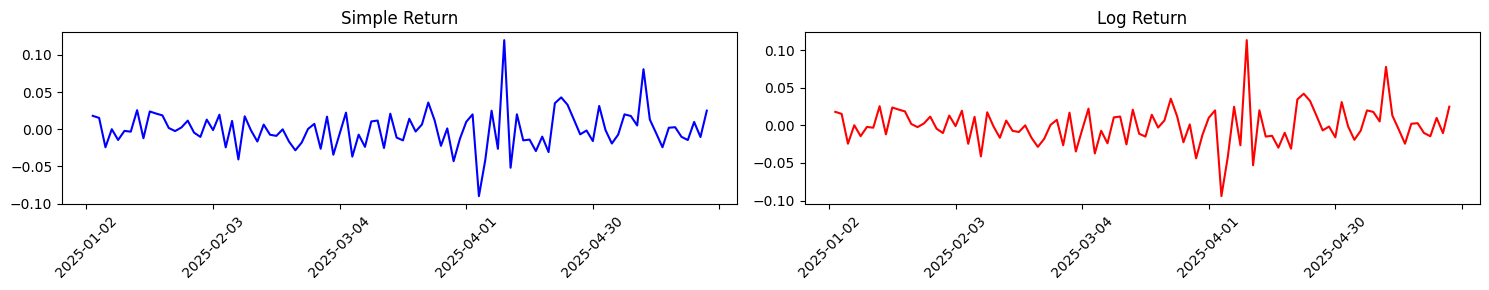

Simple Return: -0.0347 %
Log Return: -0.06801 %


In [91]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
df_daily['simple_return'].plot(ax=axes[0], title='Simple Return', color='blue')
df_daily['log_return'].plot(ax=axes[1], title='Log Return', color='red')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

print(f"Simple Return: {round(df_daily['simple_return'].mean() * 100, 5)} %")
print(f"Log Return: {round(df_daily['log_return'].mean() * 100, 5)} %")